In [28]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


The way I went about solving this problem was through using the idea of Monte Carlo Integration. You create a square with its sidelengths the same length as the diameter of the circle. You then generate random points within the square and circle and find the ration of the sum of the points within the circle and divide it by the total points and multiply it by 4 giving you an estimate for pi. I think I got a relatively good estimate for pi using a simple method. The more points you generate the better the estimate for pi is so if I want a more precise estimate then I need to include more points.

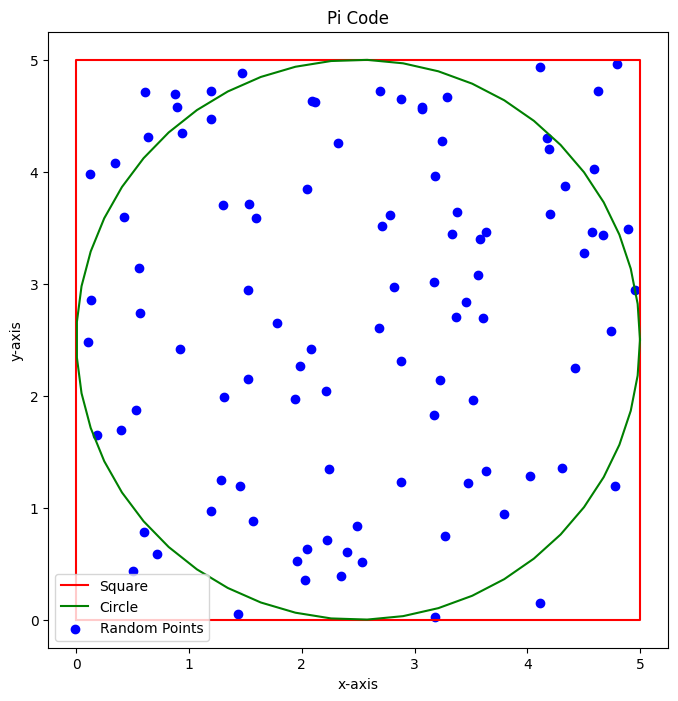

80
3.2


In [69]:
def picode(sidelength,radius,points): #creates a function that takes into account the sidelength, radius, and # of points

    #creates the square given the sidelength
    squarex= np.array([0,sidelength,sidelength,0,0])
    squarey= np.array([0,0,sidelength,sidelength,0])

    
    #creates the circle given the radius and uses sidelength to center the circle

    theta = np.linspace(0,2*np.pi,50)
    circlex = radius*np.cos(theta)+sidelength/2
    circley = radius*np.sin(theta)+sidelength/2
    
    # creates random points on the graph

    randomx = np.random.uniform(0,sidelength,points)
    randomy = np.random.uniform(0,sidelength,points)
    
    # method of finding if a point is within the circle

    insidecircle = np.sqrt((randomx-sidelength/2)**2+(randomy-sidelength/2)**2)<= radius
    
    
    #creating the graph
    plt.figure(figsize=(8,8))
    plt.plot(squarex,squarey,label='Square',color='r')
    plt.plot(circlex,circley,label='Circle',color='g')
    plt.scatter(randomx,randomy,label="Random Points",color='b')
    plt.title("Pi Code")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()


    #solve for pi
    estimatepi= 4*(np.sum(insidecircle)/points)
    print(np.sum(insidecircle))
    print(estimatepi)



picode(5,2.5,100)

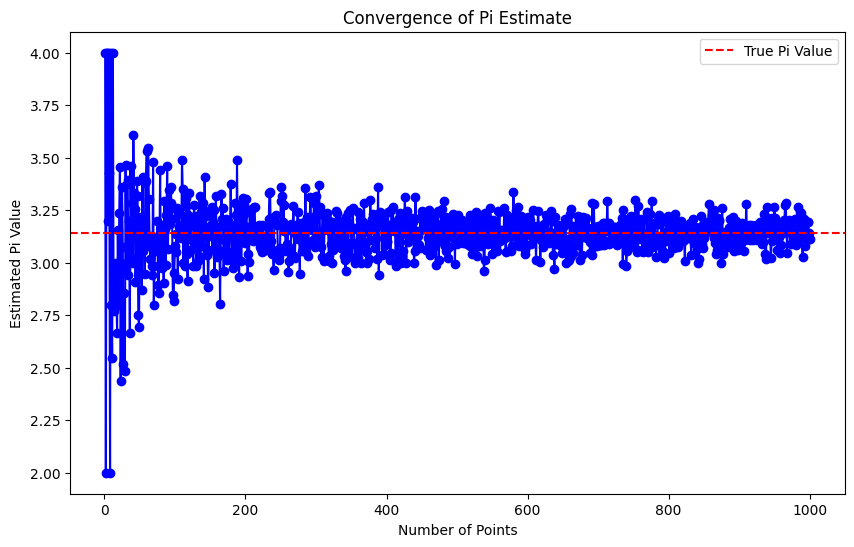

Final estimated value of pi with 1000 points: 3.112


In [85]:
def picode(sidelength,radius,points): #creates a function that takes into account the sidelength, radius, and # of points

    #creates the square given the sidelength
    squarex= np.array([0,sidelength,sidelength,0,0])
    squarey= np.array([0,0,sidelength,sidelength,0])

    
    #creates the circle given the radius and uses sidelength to center the circle
    theta = np.linspace(0,2*np.pi,50)
    circlex = radius*np.cos(theta)+sidelength/2
    circley = radius*np.sin(theta)+sidelength/2
    
    # creates random points on the graph
    randomx = np.random.uniform(0,sidelength,points)
    randomy = np.random.uniform(0,sidelength,points)
    
    # method of finding if a point is within the circle
    insidecircle = np.sqrt((randomx-sidelength/2)**2+(randomy-sidelength/2)**2)<= radius

    #create list
    estimatedpivalues = [] 

    #create for loop to test
    for i in range(1, points + 1):
        randomx = np.random.uniform(0, sidelength, i)
        randomy = np.random.uniform(0, sidelength, i)
        insidecircle = np.sqrt((randomx - sidelength / 2) ** 2 + (randomy - sidelength / 2) ** 2) <= radius

        estimatepi = 4 * (np.sum(insidecircle) / i)
        estimatedpivalues.append(estimatepi)

    # Create a plot 
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, points + 1), estimatedpivalues, marker='o', linestyle='-', color='b')
    plt.axhline(np.pi, color='r', linestyle='--', label='True Pi Value')
    plt.title("Convergence of Pi")
    plt.xlabel('Number of Points')
    plt.ylabel('Estimated Pi Value')
    plt.legend()
    plt.show()

# Initial values
sidelengthinitial = 5
radiusinitial = 2.5
pointsinitial = 1000

# Run the picode function with increasing points
picode(sidelengthinitial, radiusinitial, pointsinitial)